In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [38]:
#define model for dataset
def Area(x , y):
  neur1 = McCulloch_Pitts_neuron([-2, -1] , -6)
  neur2 = McCulloch_Pitts_neuron([2, -1] , 2)
  neur3 = McCulloch_Pitts_neuron([0, 1] , 0)
  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1],3)
  #neur4 = neur1 & neur2 & neur3

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur4.model(np.array([z1, z2, z3]))
  # 3 bit output

  return list([z4])

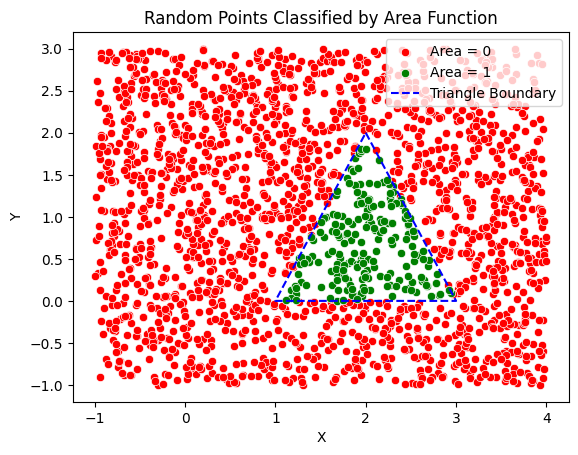

In [41]:
# Generate 2000 random points in the range [-1, 4] for x and [-1, 3] for y coordinates
num_points = 2000
x_values = np.random.uniform(-1, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Initialize lists to store data points for different z5 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == [0]:  # z5 value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z5 value is 1
        green_points.append((x_values[i], y_values[i]))
# Convert lists to NumPy arrays for plotting
red_points = np.array(red_points)
green_points = np.array(green_points)

# Plot the results using Seaborn
sns.scatterplot(x=red_points[:, 0], y=red_points[:, 1], color='red', label='Area = 0')
sns.scatterplot(x=green_points[:, 0], y=green_points[:, 1], color='green', label='Area = 1')
plt.plot([2, 3, 1, 2], [2, 0, 0, 2], color='blue', linestyle='--', label='Triangle Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points Classified by Area Function')
plt.legend()
plt.show()


## Sigmoid

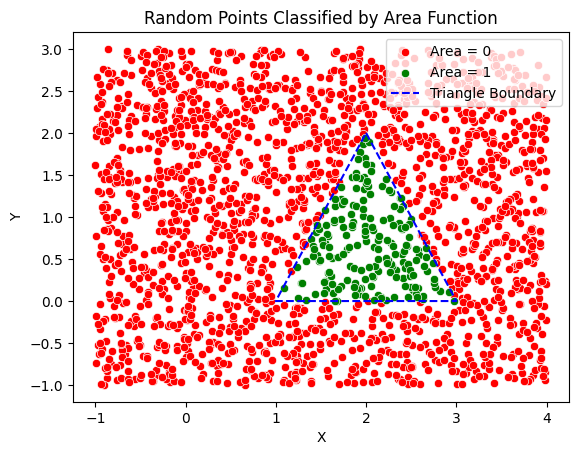

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold):
        self.weights = weights  # define weights
        self.threshold = threshold  # define threshold

    def model(self, x):
        # Apply the weights and calculate the linear combination
        linear_combination = np.dot(self.weights, x)
        # Apply the threshold comparison
        output = 1 if linear_combination >= self.threshold else 0
        return output

# Define the final neuron with sigmoid activation
class SigmoidNeuron():
    def __init__(self, weights, threshold):
        self.weights = weights  # define weights
        self.threshold = threshold  # define threshold

    def model(self, x):
        # Apply the weights and calculate the linear combination
        linear_combination = np.dot(self.weights, x) - self.threshold
        # Apply the sigmoid activation function
        activated_output = sigmoid(linear_combination)
        # Determine the binary output based on the sigmoid activation
        return 1 if activated_output >= 0.5 else 0

# Define the model for the dataset
def Area(x, y):
    neur1 = McCulloch_Pitts_neuron([-2, -1], -6)
    neur2 = McCulloch_Pitts_neuron([2, -1], 2)
    neur3 = McCulloch_Pitts_neuron([0, 1], 0)
    neur4 = SigmoidNeuron([1, 1, 1], 3)  # Use sigmoid neuron for z4 with adjusted threshold

    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur4.model(np.array([z1, z2, z3]))  # Use activate function for decision

    return z4  # Final binary decision based on sigmoid output

# Generate 2000 random points in the range [-1, 4] for x and [-1, 3] for y coordinates
num_points = 2000
x_values = np.random.uniform(-1, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Initialize lists to store data points for different z4 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == 0:  # z4 value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z4 value is 1
        green_points.append((x_values[i], y_values[i]))

# Convert lists to NumPy arrays for plotting
red_points = np.array(red_points)
green_points = np.array(green_points)

# Check for empty arrays before plotting
if red_points.size > 0:
    sns.scatterplot(x=red_points[:, 0], y=red_points[:, 1], color='red', label='Area = 0')
if green_points.size > 0:
    sns.scatterplot(x=green_points[:, 0], y=green_points[:, 1], color='green', label='Area = 1')

plt.plot([2, 3, 1, 2], [2, 0, 0, 2], color='blue', linestyle='--', label='Triangle Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points Classified by Area Function')
plt.legend()
plt.show()


## Relu

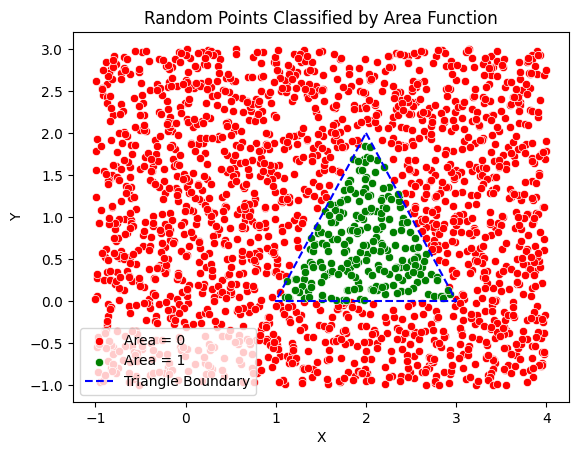

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold):
        self.weights = weights  # define weights
        self.threshold = threshold  # define threshold

    def model(self, x):
        # Apply the weights and calculate the linear combination
        linear_combination = np.dot(self.weights, x)
        # Apply the threshold comparison
        output = 1 if linear_combination >= self.threshold else 0
        return output

# Define the final neuron with ReLU activation
class ReluNeuron():
    def __init__(self, weights, threshold):
        self.weights = weights  # define weights
        self.threshold = threshold  # define threshold

    def model(self, x):
        # Apply the weights and calculate the linear combination
        linear_combination = np.dot(self.weights, x) - self.threshold
        # Apply the ReLU activation function
        activated_output = relu(linear_combination)
        # Determine the binary output based on the ReLU activation
        return 1 if activated_output > 0 else 0

# Define the model for the dataset
def Area(x, y):
    neur1 = McCulloch_Pitts_neuron([-2, -1], -6)
    neur2 = McCulloch_Pitts_neuron([2, -1], 2)
    neur3 = McCulloch_Pitts_neuron([0, 1], 0)
    neur4 = ReluNeuron([1, 1, 1], 2)  # Use ReLU neuron for z4 with adjusted threshold

    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur4.model(np.array([z1, z2, z3]))  # Use activate function for decision

    return z4  # Final binary decision based on ReLU output

# Generate 2000 random points in the range [-1, 4] for x and [-1, 3] for y coordinates
num_points = 2000
x_values = np.random.uniform(-1, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Initialize lists to store data points for different z4 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == 0:  # z4 value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z4 value is 1
        green_points.append((x_values[i], y_values[i]))

# Convert lists to NumPy arrays for plotting
red_points = np.array(red_points)
green_points = np.array(green_points)

# Check for empty arrays before plotting
if red_points.size > 0:
    sns.scatterplot(x=red_points[:, 0], y=red_points[:, 1], color='red', label='Area = 0')
if green_points.size > 0:
    sns.scatterplot(x=green_points[:, 0], y=green_points[:, 1], color='green', label='Area = 1')

plt.plot([2, 3, 1, 2], [2, 0, 0, 2], color='blue', linestyle='--', label='Triangle Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points Classified by Area Function')
plt.legend()
plt.show()
